## Entropy and Mutal Information

- Quantification of lossiness
- Uncertainity reduction (similar to p value? - meausre of absence of surprise)
- How much do you learn newly
- Unbiased coin toss - one extra bit
- Biased coin toss - less than one bit (lesser information; because you already know something about the outcome)
- Max entropy when it is a uniform distribution
- Mutual information: How much you learn about one variable by observing the other
- Mutual information doesn't make any assumptions about the relation between the two variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Assuming uniform distribution and coin flips: 1, 2, random, 3
np.log2(2), np.log2(4), np.log2(3), np.log2(8)

(1.0, 2.0, 1.584962500721156, 3.0)

In [6]:
# Probabilities of outcomes
# Assuming uniform distribution; H and T
N = 2

# Just getting the ?information? of a single flip, H or T
np.log2(1/N)

-1.0

In [7]:
# Average uncertainity over all possible outcomes
# Assuming uniform distribution
N = 16
H = 0

for i in range(N):
    H += -np.log2(1/N)

H /= N
print(H)

4.0


In [16]:
# Biased coin flip; probab vs Entropy
probab = np.arange(0.001, 0.999, 0.001)
px = np.zeros((2, len(probab)))

# Let probab be the heads
px[0, :] = probab
px[1, :] = 1 - probab

Harr = -px * np.log2(px)
Harr = np.sum(Harr, axis=0)

# for i in range(len(probab)):
#     p = probab[i]
#     Harr[i] += -np.log2(p)*p
#     Harr[i] += -np.log2(1-p)*(1-p)

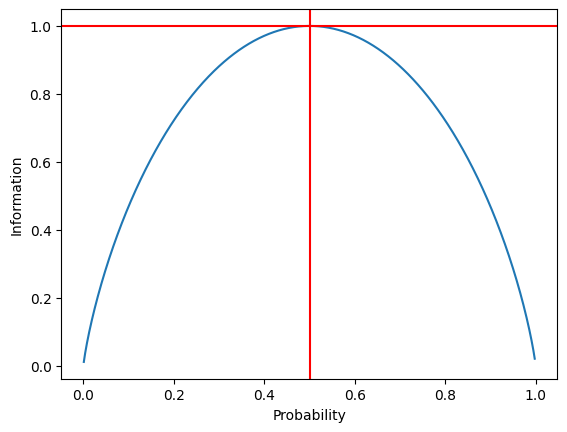

In [21]:
plt.figure()
plt.plot(probab, Harr)
plt.axvline(0.5, color='r')
plt.axhline(1, color='r')
plt.xlabel("Probability")
plt.ylabel("Information")
plt.show()

### Mutual Information

- Relation between the two variables
- Perfectly related: don't have to measure y, just measure x; MI = H(x) or H(y)
- unrelated: dont't have to measure x at all to estimate y

```
MI = H(X) - H(X|Y)
```

- Point (1) happens because when x, y are related, then H(X|Y) is low. Because x is determinant now. No longer stochastic.

- Mutual information is symmetric

$$
H(X) = \sum(p(x) * -log(p(x)))
$$

In [47]:
np.random.seed(0)
N = 10**5

x = np.round(np.random.rand(N))
y = np.round(np.random.rand(N))

# probab of matching values
p_list = [0.5, 0.9, 0.999]

for p in p_list:
    idx = int(p*N)
    # Swap 90 of the values from x to y
    y[:idx] = x[:idx]

    px = np.zeros(2)
    px[0] = np.sum(x)/N
    px[1] = 1 - px[0]

    Hx = np.sum(-px*np.log2(px))

    py = np.zeros(2)
#     py[0] = np.sum(y)/N
#     py[1] = 1 - py[0]

#     pxy = np.zeros((2, 2))
    Hxy = 0
    # Loop for y
    for i in range(2):
        py[i] = np.sum(y==i)/len(y)
        
        # Loop for x
        tmp = 0
        for j in range(2):
            pxy[i, j] = np.sum((y==i) & (x==j))/np.sum(y==i)
            tmp += -pxy[i, j]*np.log2(pxy[i, j])
        
        Hxy += tmp*py[i]

    # Hxy = np.sum((-pxy*np.log2(pxy))@py)

    MI = Hx - Hxy
    print(f'p: {p}; Entropy of x: {Hx}; MI: {MI}')

p: 0.5; Entropy of x: 0.9999991271693243; MI: 0.1894112520938691
p: 0.9; Entropy of x: 0.9999991271693243; MI: 0.7157306619161687
p: 0.999; Entropy of x: 0.9999991271693243; MI: 0.9939119808203132


In [50]:
from sklearn.metrics import mutual_info_score
from math import isclose

sklearn_MI = mutual_info_score(x,y) * np.log2(np.e)

assert(isclose(MI, sklearn_MI))
sklearn_MI, MI

(0.9939119808203133, 0.9939119808203132)

### Sample time series data.
- Assume that there are some conditions in which the response is measured
- Can we get an estimate of what the mutual information between the response and input is?
- Links to the Fisher Information - getting the estimate of internal variable given the external measureable value

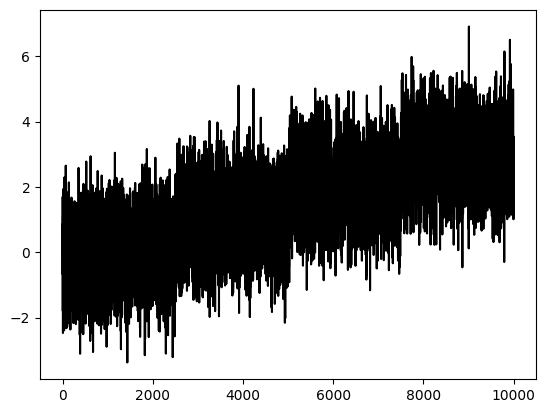

In [69]:
N = 10**4
num_conds = 4
cond_means = [0, 1, 2, 3]
scale = 1 # 10
resp = []
conds = []

for i in np.arange(num_conds):
    resp = np.hstack((resp, np.random.randn(int(N/num_conds))+cond_means[i]*scale))
    conds = np.hstack((conds, i*np.ones(int(N/num_conds))))
    
plt.plot(np.arange(N), resp, 'k')
plt.show()

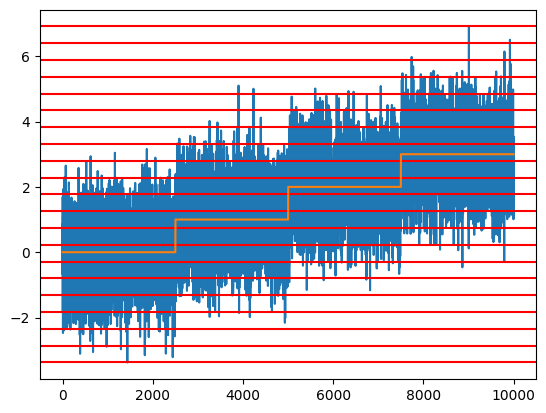

In [70]:
edges = np.histogram_bin_edges(resp, bins=20)
plt.plot(np.arange(N), resp)
for i in edges:
    plt.axhline(i, color='r')

plt.plot(np.arange(N), conds)
plt.show()

bin_y = np.digitize(resp, edges)

In [71]:
MI = mutual_info_score(conds, bin_y) * np.log2(np.e)
MI

0.5697675937783662